In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from helper_functions import plot_decision_boundary, make_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.datasets import fashion_mnist

In [2]:
# get sample
n_samples = 1000

x, y = make_circles(n_samples=n_samples, noise=0.03, random_state=42)

In [3]:
x[:5], x.shape

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 (1000, 2))

In [4]:
y[:5]

array([1, 1, 1, 1, 0])

In [5]:
circles = pd.DataFrame({"x0":x[:,0], "x1":x[:,1], "label":y })
circles.head()

,x0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [6]:
# split data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
len(x_train), len(x_test), len(y_train), len(y_test)

(800, 200, 800, 200)

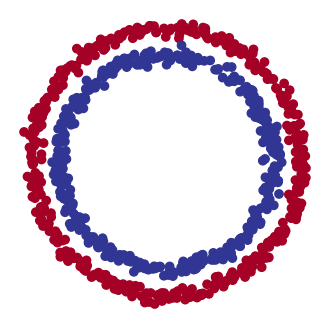

In [7]:
# Visualize
plt.figure(figsize=(4,4))
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap=plt.cm.RdYlBu)
plt.axis(False);

In [8]:
# Step in model
tf.random.set_seed(42)

model_1 = keras.Sequential([
    keras.layers.Dense(units=4, activation="relu"),
    keras.layers.Dense(units=4, activation="relu"),
    keras.layers.Dense(units=1, activation="sigmoid")
    ])


# model_1.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])
# lr_scheduler = keras.callbacks.LearningRateScheduler(
#     schedule= lambda epoch: 1e-4 * 10**(epoch/20), verbose=0)
model_1.compile(loss="binary_crossentropy", optimizer="Adam", 
                metrics="accuracy")
lr = 0.02
lr_scheduler = keras.callbacks.LearningRateScheduler(schedule= lambda x: lr)
epochs = 25
history = model_1.fit(x=x_train, y=y_train, epochs=epochs, verbose=0, callbacks=[lr_scheduler])

2024-02-27 19:35:45.601405: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: UNKNOWN ERROR (34)


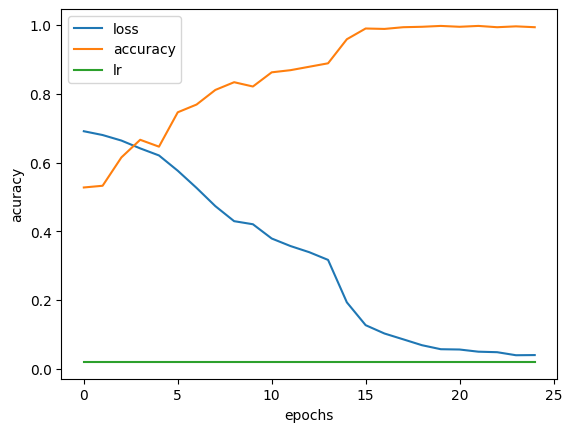

In [9]:
pd.DataFrame(history.history).plot()
plt.xlabel("epochs")
plt.ylabel("acuracy");

313/313 [==============================] - 0s 449us/step
doing binary classifcation...


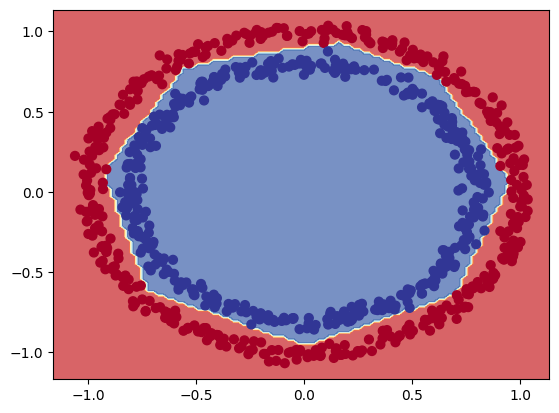

In [10]:
plot_decision_boundary(model=model_1, X=x_train, y=y_train)

In [11]:
loss, accuracy = model_1.evaluate(x_train,y_train)
print(f"Model loss on the test: {loss:.4f}")
print(f"Model accuracy on the test: {accuracy:.4f}")

25/25 [==============================] - 0s 576us/step - loss: 0.0312 - accuracy: 0.9987
Model loss on the test: 0.0312
Model accuracy on the test: 0.9987


7/7 [==============================] - 0s 577us/step


313/313 [==============================] - 0s 411us/step
doing binary classifcation...


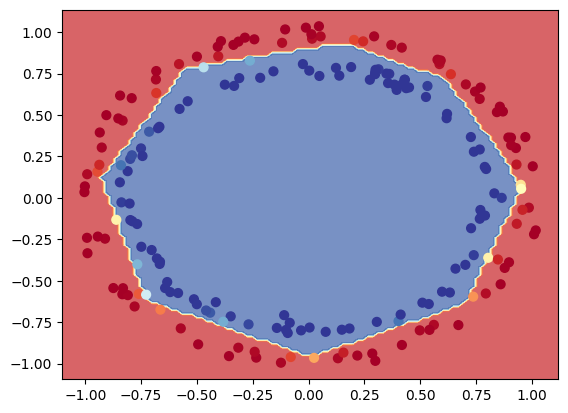

In [12]:
y_pred = history.model.predict(x_test)

plot_decision_boundary(model=model_1, X=x_test, y=y_pred)

### Finding the best learning rate

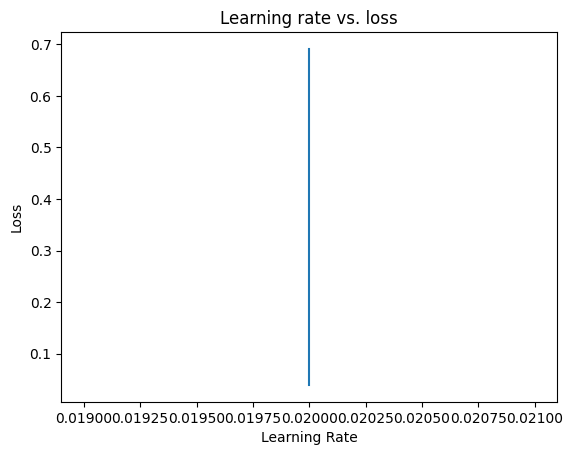

In [13]:
# loss vs lr
#lr = lr * (10 ** (np.arange(epochs)/20))
plt.plot( np.repeat(lr, epochs) , history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

In [14]:
# create confusion prediction
y_preds = model_1.predict(x_test)

confusion_matrix(y_true=y_test, y_pred=y_preds.round())

7/7 [==============================] - 0s 563us/step


array([[98,  2],
       [ 2, 98]])

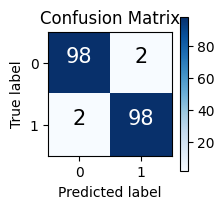

In [25]:
make_confusion_matrix(y_true=y_test, y_pred=y_preds.round(), figsize=(2,2))

## Multiclass classification

In [3]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [12]:
# check data min and manx
train_data.min(), train_data.max()

(0.0, 1.0)

In [ ]:
# normalize data
train_data = train_data/255.0
test_data = test_data/255.0

In [4]:
print(f"Length train data: {len(train_data)} ")
print(f"Length test data: {len(test_data)} ")
print(f"Shape train data: {train_data.shape}")


Length train data: 60000 
Length test data: 10000 
Shape train data: (60000, 28, 28)


In [5]:
# class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

len(class_names)

10

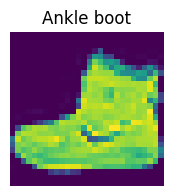

In [6]:
# plot single sample
plt.figure(figsize=(2,2))
plt.imshow(train_data[0])
plt.title( class_names[train_labels[0]])
plt.axis(False);

In [34]:
# build model
tf.random.set_seed(42)

model_fashion = keras.Sequential([
    keras.layers.Flatten( input_shape=(28,28)), # size image = 28x28
    keras.layers.Dense(units=4, activation="relu"),
    keras.layers.Dense(units=4, activation="relu"),
    keras.layers.Dense(units=10, activation="softmax"), # output N°de clases, activation is softmax
])

model_fashion.compile(loss="SparseCategoricalCrossentropy", optimizer="Adam", # Aqui es el error del shape
                      metrics=["accuracy"])

history = model_fashion.fit(train_data, train_labels, epochs=20, 
                            validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 2s 795us/step - loss: 1.2351 - accuracy: 0.5436 - val_loss: 0.7731 - val_accuracy: 0.7470
Epoch 2/20
1875/1875 [==============================] - 1s 788us/step - loss: 0.6620 - accuracy: 0.7818 - val_loss: 0.6639 - val_accuracy: 0.7798
Epoch 3/20
1875/1875 [==============================] - 1s 772us/step - loss: 0.5880 - accuracy: 0.8031 - val_loss: 0.6312 - val_accuracy: 0.7869
Epoch 4/20
1875/1875 [==============================] - 1s 775us/step - loss: 0.5597 - accuracy: 0.8119 - val_loss: 0.5959 - val_accuracy: 0.7993
Epoch 5/20
1875/1875 [==============================] - 1s 770us/step - loss: 0.5439 - accuracy: 0.8152 - val_loss: 0.5908 - val_accuracy: 0.7995
Epoch 6/20
1875/1875 [==============================] - 1s 722us/step - loss: 0.5318 - accuracy: 0.8185 - val_loss: 0.5837 - val_accuracy: 0.8010
Epoch 7/20
1875/1875 [==============================] - 1s 704us/step - loss: 0.5240 - accuracy: 0.8203 - val_loss: 0.5854 -

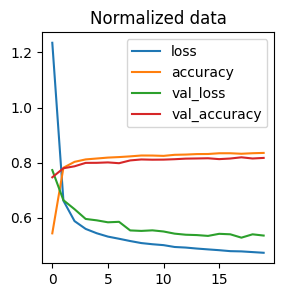

In [35]:
pd.DataFrame(history.history).plot(title="Normalized data", figsize=(3,3));

## Find learn rate optim

In [27]:
tf.random.set_seed(42)

model_2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(units=4, activation="relu"),
    keras.layers.Dense(units=4, activation="relu"),
    keras.layers.Dense(units=10, activation="softmax")
])

model_2.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
                optimizer="Adam", metrics=["accuracy"])

lrs = keras.callbacks.LearningRateScheduler(schedule= lambda epoch: 1e-3 *10**(epoch/20))
epochs = 40
history_2 = model_2.fit(x=train_data, y=train_labels, validation_data=(test_data, test_labels),
                        epochs=epochs, callbacks=lrs, verbose=0)

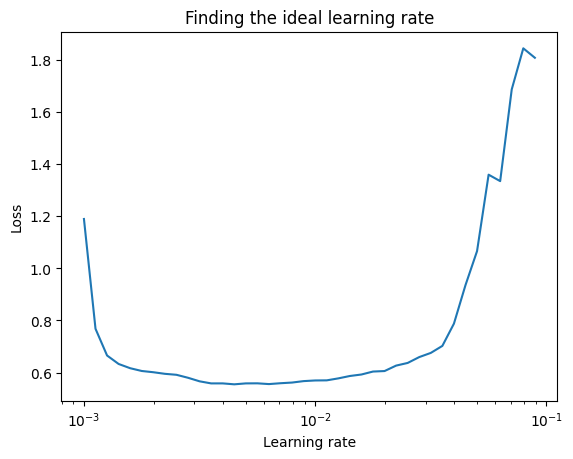

In [31]:
# plot the learning rate decay curve
epochs=40

lrs = 1e-3 * (10 ** (tf.range(epochs)/20))
plt.semilogx(lrs, history_2.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [36]:
# lr ideal
10**-3 

0.001

In [50]:
# predict probability
y_pred_prob = model_fashion.predict(test_data)
y_pred_prob[0]

313/313 [==============================] - 0s 523us/step


array([2.8934251e-06, 2.0764463e-09, 1.8678654e-09, 2.5171614e-06,
       2.0656001e-08, 3.3233190e-01, 2.4036267e-06, 1.1161601e-01,
       4.9844314e-03, 5.5105984e-01], dtype=float32)

In [52]:
# predict labels
y_pred_label = y_pred_prob.argmax(axis=1)
y_pred_label[0]

9

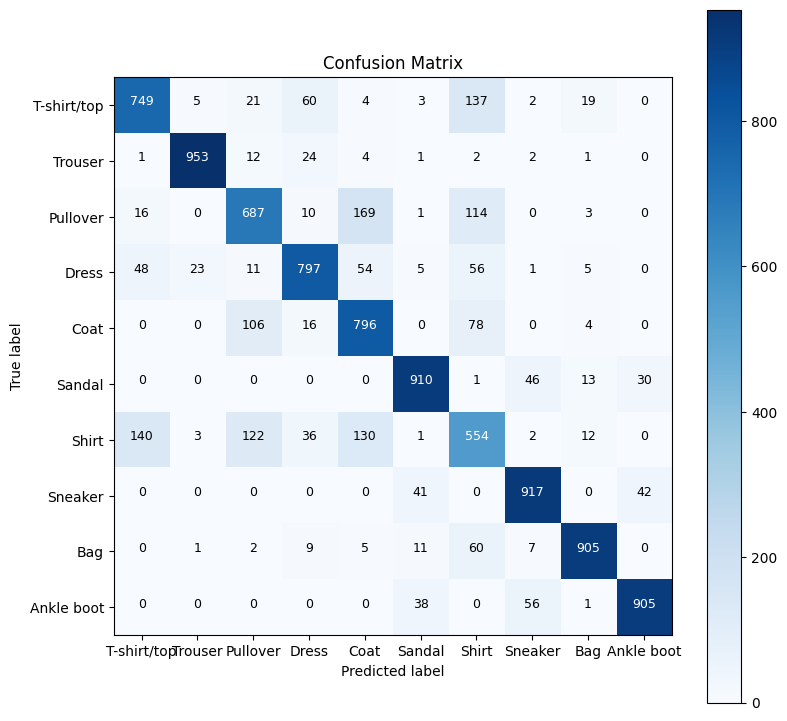

In [59]:
# confusion matrix
make_confusion_matrix(y_true=test_labels, y_pred=y_pred_label, classes=class_names, 
                      text_size=9,figsize=(9,9))

## Activations functions

In [15]:
x = tf.range(start=-10, limit=10, delta=.1, dtype=tf.float64)

tf.Tensor(
[-10.   -9.9  -9.8  -9.7  -9.6  -9.5  -9.4  -9.3  -9.2  -9.1  -9.   -8.9
  -8.8  -8.7  -8.6  -8.5  -8.4  -8.3  -8.2  -8.1  -8.   -7.9  -7.8  -7.7
  -7.6  -7.5  -7.4  -7.3  -7.2  -7.1  -7.   -6.9  -6.8  -6.7  -6.6  -6.5
  -6.4  -6.3  -6.2  -6.1  -6.   -5.9  -5.8  -5.7  -5.6  -5.5  -5.4  -5.3
  -5.2  -5.1  -5.   -4.9  -4.8  -4.7  -4.6  -4.5  -4.4  -4.3  -4.2  -4.1
  -4.   -3.9  -3.8  -3.7  -3.6  -3.5  -3.4  -3.3  -3.2  -3.1  -3.   -2.9
  -2.8  -2.7  -2.6  -2.5  -2.4  -2.3  -2.2  -2.1  -2.   -1.9  -1.8  -1.7
  -1.6  -1.5  -1.4  -1.3  -1.2  -1.1  -1.   -0.9  -0.8  -0.7  -0.6  -0.5
  -0.4  -0.3  -0.2  -0.1   0.    0.1   0.2   0.3   0.4   0.5   0.6   0.7
   0.8   0.9   1.    1.1   1.2   1.3   1.4   1.5   1.6   1.7   1.8   1.9
   2.    2.1   2.2   2.3   2.4   2.5   2.6   2.7   2.8   2.9   3.    3.1
   3.2   3.3   3.4   3.5   3.6   3.7   3.8   3.9   4.    4.1   4.2   4.3
   4.4   4.5   4.6   4.7   4.8   4.9   5.    5.1   5.2   5.3   5.4   5.5
   5.6   5.7   5.8   5.9   6.    6.1   6

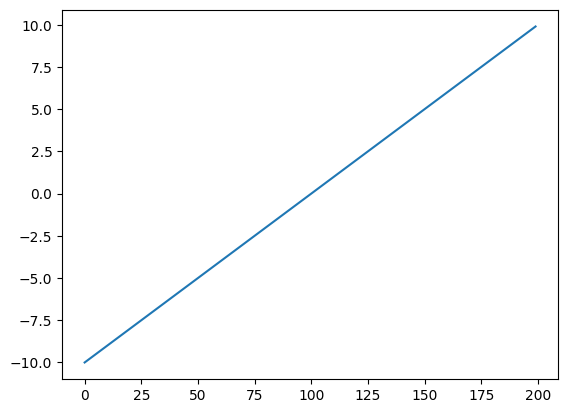

In [16]:
# Linear
print(keras.activations.linear(x)) # es lo mismo que abajo
plt.plot(x)

tf.Tensor(
[4.53978687e-05 5.01721647e-05 5.54485247e-05 6.12797396e-05
 6.77241496e-05 7.48462275e-05 8.27172229e-05 9.14158739e-05
 1.01029194e-04 1.11653341e-04 1.23394576e-04 1.36370327e-04
 1.50710358e-04 1.66558065e-04 1.84071905e-04 2.03426978e-04
 2.24816770e-04 2.48455082e-04 2.74578156e-04 3.03447030e-04
 3.35350130e-04 3.70606141e-04 4.09567165e-04 4.52622223e-04
 5.00201107e-04 5.52778637e-04 6.10879359e-04 6.75082731e-04
 7.46028834e-04 8.24424686e-04 9.11051194e-04 1.00677082e-03
 1.11253603e-03 1.22939862e-03 1.35851995e-03 1.50118226e-03
 1.65880108e-03 1.83293894e-03 2.02532039e-03 2.23784852e-03
 2.47262316e-03 2.73196076e-03 3.01841632e-03 3.33480731e-03
 3.68423990e-03 4.07013772e-03 4.49627316e-03 4.96680165e-03
 5.48629890e-03 6.05980149e-03 6.69285092e-03 7.39154134e-03
 8.16257115e-03 9.01329865e-03 9.95180187e-03 1.09869426e-02
 1.21284350e-02 1.33869178e-02 1.47740317e-02 1.63024994e-02
 1.79862100e-02 1.98403057e-02 2.18812709e-02 2.41270214e-02
 2.65969936e-

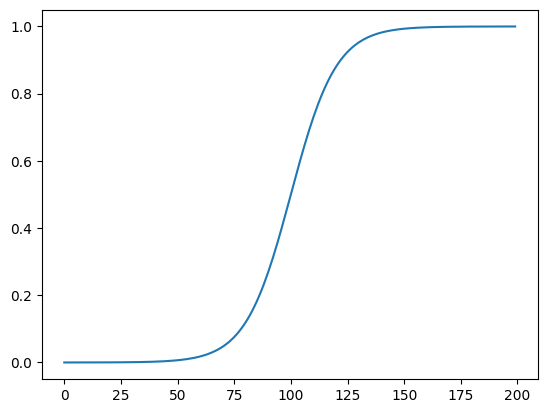

In [17]:
# sigmoid
print(keras.activations.sigmoid(x)) # es lo mismo que abajo
plt.plot(1/(1+tf.exp(-x)))

tf.Tensor(
[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7
 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5
 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3
 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1
 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9
 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7
 9.8 9.9], shape=(200,), dtype=float64)


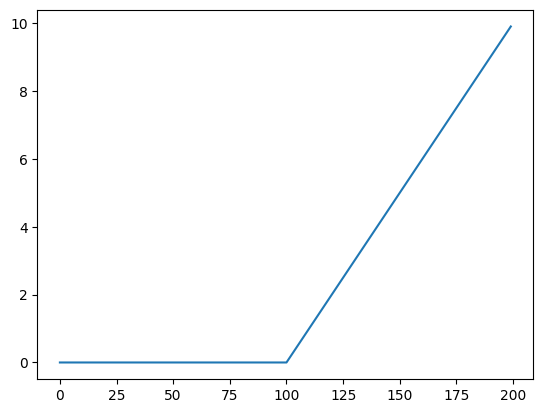

In [18]:
# relu
print(keras.activations.relu(x)) # es lo mismo que abajo
plt.plot(tf.maximum(0,x))